In [327]:
from datascience import *
import numpy as np
all_clean_nodes = Table.read_table('all_clean_nodes.csv')
all_clean_nodes.show()
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Unnamed: 0,Dataset of Origin,ResponseId,Q1.2,Q1.3,Q1.4_1,Q1.4_2,Q1.5,Q1.5_8_TEXT,Q2.2_1,Q2.2_2,Q2.2_3,Q2.2_4,Q3,Q2.4,Q91,Q91_3_TEXT,Q1.7,Q1.8_1,Q1.8_2,Q1.8_3,Q1.8_4,Q1.8_5,Q1.8_6,Q1.8_7,Q1.8_8,Q1.8_9,Q1.8_10,Q1.8_10_TEXT,Q4.5
0,2015-2021,Response ID,First and Last Name,School,For how many years have you taught? - In your current school,For how many years have you taught? - In general,What subject matters do you teach? Choose all that are a ...,What subject matters do you teach? Choose all that are a ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How often do you use the solutionary teaching practices? ...,Has ESTF’s solutionary teaching practices empowered you ...,Would you be likely to collaborate with a CBP if you did ...,Would you be likely to collaborate with a CBP if you did ...,Would you say your school is mild/medium or spicy in its ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,Do you experience any barriers? What else will you want ...
1,2015-2021,R_d5SNvrU99sYqA2R,Jadelyn CHang,Foster City Elementary School,17,23,Multiple subjects (k-5),nan,3,5,3,3,nan,nan,nan,nan,Mild,Is part of my class culture,Is part of my class culture,Is a school wide practice,"Is part of my class culture,Is a school wide practice","Is part of my class culture,Is a school wide practice","Is part of my class culture,Is a school wide practice",nan,Is part of my class culture,Is part of my class culture,nan,nan,nan
2,2015-2021,R_74fksyd5JgKrNN7,Jessica Tiatia,Westmoor High School,24,27,Science,nan,4,5,3,3,nan,nan,nan,nan,Mild,Is part of my class culture,nan,Is part of my class culture,Is part of my class culture,Is part of my class culture,nan,nan,nan,nan,nan,nan,They have been spectacular
3,2015-2021,R_3McfwIOX01npmsY,Corinna Low,Westborough MS,17,17,Science,nan,4,5,4,4,nan,nan,nan,nan,Mild,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is a school wide practice,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,nan,nan,"I love the support and maybe if I need help, they can he ..."
4,2015-2021,R_6WEo0VMf44d6xSV,Julie Hilborn,Hillview,20,22,"Science,Other",Environmental science,4,5,3,3,nan,nan,nan,nan,Medium,Is part of my class culture,Is a school wide practice,Is a school wide practice,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,nan,nan,I am still not good at environmental action. I think tim ...
5,2015-2021,R_2sKuIf1H3WYWQff,Sarah Hartman,Connect Community Charter School,3,3,Multiple subjects (k-5),nan,4,4,3,1,nan,nan,nan,nan,Mild,Is part of my class culture,Is a school wide practice,Is a school wide practice,Is part of my class culture,Is a school wide practice,Is part of my class culture,Is a school wide practice,Is part of my class culture,Is a school wide practice,nan,nan,Trainings for admin on environmental education standards ...
8,2015-2021,R_4PKhNA1uLurg7tv,Andrew McCarty,Summit Public Schools,8,10,Science,nan,2,4,1,3,I use it for specific units,"Yes, it empowered me to lead change in schoo

In [328]:
dataset = all_clean_nodes.relabel(2, 'TeacherID').select(2, 3, 9, 10, 11,12)
dataset.relabel(2, "Q1").relabel(1, "Name").relabel(3, "Q2").relabel(4, "Q3").relabel(5, "Q4")
dataset.show()

TeacherID,Name,Q1,Q2,Q3,Q4
Response ID,First and Last Name,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...
R_d5SNvrU99sYqA2R,Jadelyn CHang,3,5,3,3
R_74fksyd5JgKrNN7,Jessica Tiatia,4,5,3,3
R_3McfwIOX01npmsY,Corinna Low,4,5,4,4
R_6WEo0VMf44d6xSV,Julie Hilborn,4,5,3,3
R_2sKuIf1H3WYWQff,Sarah Hartman,4,4,3,1
R_4PKhNA1uLurg7tv,Andrew McCarty,2,4,1,3
R_3ra0any8r7MSrQZ,Susan Perez,5,5,5,3
R_2ffivicjRBStcoY,Ann Akey,5,5,4,4
R_1f7soXsTFXEJUVp,Susan Hansen,4,4,4,4


In [329]:
averages = dataset.take(np.arange(1,121))
average_q1 = averages.select(0,2).where(1, are.not_equal_to("nan")).column('Q1')
average_q2 = averages.select(0,3).where(1, are.not_equal_to("nan")).column('Q2')
average_q3 = averages.select(0,4).where(1, are.not_equal_to("nan")).column('Q3')
average_q4 = averages.select(0,5).where(1, are.not_equal_to("nan")).column('Q4')

In [330]:
final_average_q1 = np.average(average_q1.astype(float))
final_average_q1

3.6779661016949152

In [331]:
final_average_q2 = np.average(average_q2.astype(float))
final_average_q2

4.410256410256411

In [332]:
final_average_q3 = np.average(average_q3.astype(float))
final_average_q3

3.4786324786324787

In [333]:
final_average_q4 = np.average(average_q4.astype(float))
final_average_q4

3.7304347826086954

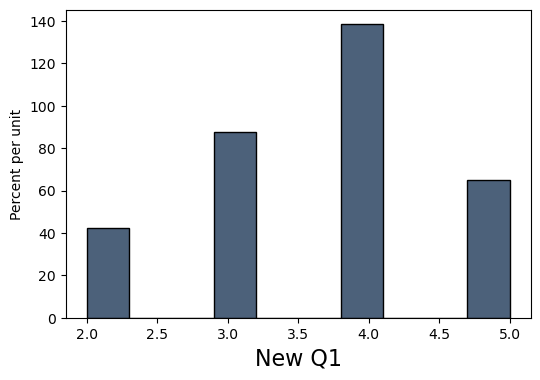

In [334]:
newq1 = averages.select(0,2).where(1, are.not_equal_to("nan"))
new_Q1 = average_q1.astype(float)
newq1 = newq1.with_columns("New Q1", new_Q1).drop('Q1')
newq1.hist('New Q1')

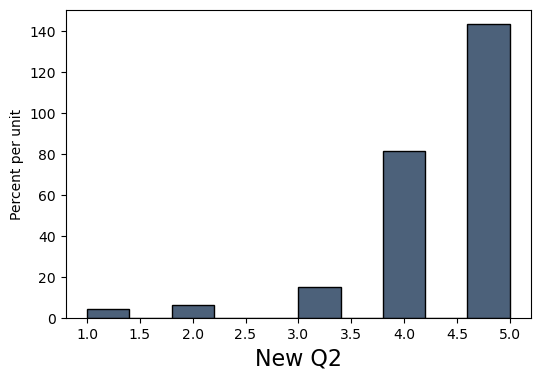

In [335]:
newq2 = averages.select(0,3).where(1, are.not_equal_to("nan"))
new_Q2 = average_q2.astype(float)
newq2 = newq2.with_columns("New Q2", new_Q2).drop('Q2')
newq2.hist('New Q2')

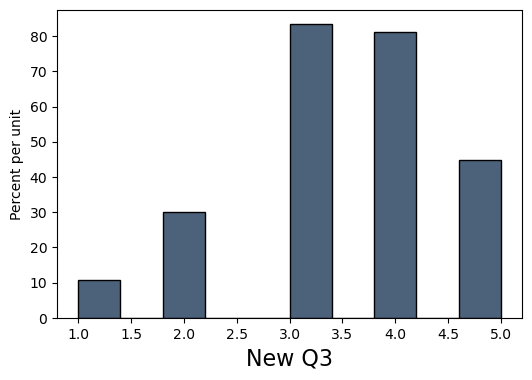

In [336]:
newq3 = averages.select(0,4).where(1, are.not_equal_to("nan"))
new_Q3 = average_q3.astype(float)
newq3 = newq3.with_columns("New Q3", new_Q3).drop('Q3')
newq3.hist('New Q3')

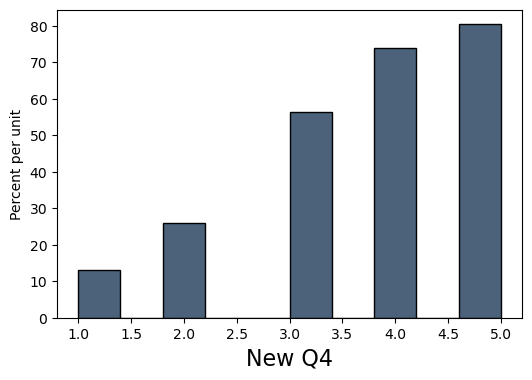

In [337]:
newq4 = averages.select(0,5).where(1, are.not_equal_to("nan"))
new_Q4 = average_q4.astype(float)
newq4 = newq4.with_columns("New Q4", new_Q4).drop('Q4')
newq4.hist('New Q4')

In [338]:
above_average_q1 = newq1.where(1, are.above(final_average_q1))

In [339]:
above_average_q2 = newq2.where(1, are.above(final_average_q2))

In [340]:
above_average_q3 = newq3.where(1, are.above(final_average_q2))

In [341]:
above_average_q4 = newq4.where(1, are.above(final_average_q2))

In [342]:
truth = make_array()
for x in newq1.column(1):
    if x > final_average_q1:
        truth = np.append(truth,1)
    else:
        truth = np.append(truth,0)
newq1.with_column('values', truth)

TeacherID,New Q1,values
R_d5SNvrU99sYqA2R,3,0
R_74fksyd5JgKrNN7,4,1
R_3McfwIOX01npmsY,4,1
R_6WEo0VMf44d6xSV,4,1
R_2sKuIf1H3WYWQff,4,1
R_4PKhNA1uLurg7tv,2,0
R_3ra0any8r7MSrQZ,5,1
R_2ffivicjRBStcoY,5,1
R_1f7soXsTFXEJUVp,4,1
R_rj2iiEWMhQCr7NL,5,1


In [343]:
truth = make_array()
for x in newq2.column(1):
    if x > final_average_q2:
        truth = np.append(truth,1)
    else:
        truth = np.append(truth,0)
newq2.with_column('values', truth)

TeacherID,New Q2,values
R_d5SNvrU99sYqA2R,5,1
R_74fksyd5JgKrNN7,5,1
R_3McfwIOX01npmsY,5,1
R_6WEo0VMf44d6xSV,5,1
R_2sKuIf1H3WYWQff,4,0
R_4PKhNA1uLurg7tv,4,0
R_3ra0any8r7MSrQZ,5,1
R_2ffivicjRBStcoY,5,1
R_1f7soXsTFXEJUVp,4,0
R_rj2iiEWMhQCr7NL,5,1


In [344]:
truth = make_array()
for x in newq4.column(1):
    if x > final_average_q4:
        truth = np.append(truth,1)
    else:
        truth = np.append(truth,0)
newq4.with_column('values', truth)

TeacherID,New Q4,values
R_d5SNvrU99sYqA2R,3,0
R_74fksyd5JgKrNN7,3,0
R_3McfwIOX01npmsY,4,1
R_6WEo0VMf44d6xSV,3,0
R_2sKuIf1H3WYWQff,1,0
R_4PKhNA1uLurg7tv,3,0
R_3ra0any8r7MSrQZ,3,0
R_2ffivicjRBStcoY,4,1
R_1f7soXsTFXEJUVp,4,1
R_rj2iiEWMhQCr7NL,5,1


In [345]:
truth = make_array()
for x in newq3.column(1):
    if x > final_average_q3:
        truth = np.append(truth,1)
    else:
        truth = np.append(truth,0)
newq3.with_column('values', truth)


TeacherID,New Q3,values
R_d5SNvrU99sYqA2R,3,0
R_74fksyd5JgKrNN7,3,0
R_3McfwIOX01npmsY,4,1
R_6WEo0VMf44d6xSV,3,0
R_2sKuIf1H3WYWQff,3,0
R_4PKhNA1uLurg7tv,1,0
R_3ra0any8r7MSrQZ,5,1
R_2ffivicjRBStcoY,4,1
R_1f7soXsTFXEJUVp,4,1
R_rj2iiEWMhQCr7NL,5,1


In [346]:
practices = all_clean_nodes.select(2,3,18, 19,20, 21, 22, 23, 24, 25, 26, 27, 28).relabel(1,'Name')
practices

TeacherID,Name,Q1.8_1,Q1.8_2,Q1.8_3,Q1.8_4,Q1.8_5,Q1.8_6,Q1.8_7,Q1.8_8,Q1.8_9,Q1.8_10,Q1.8_10_TEXT
Response ID,First and Last Name,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...
R_d5SNvrU99sYqA2R,Jadelyn CHang,Is part of my class culture,Is part of my class culture,Is a school wide practice,"Is part of my class culture,Is a school wide practice","Is part of my class culture,Is a school wide practice","Is part of my class culture,Is a school wide practice",nan,Is part of my class culture,Is part of my class culture,nan,nan
R_74fksyd5JgKrNN7,Jessica Tiatia,Is part of my class culture,nan,Is part of my class culture,Is part of my class culture,Is part of my class culture,nan,nan,nan,nan,nan,nan
R_3McfwIOX01npmsY,Corinna Low,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is a school wide practice,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,nan,nan
R_6WEo0VMf44d6xSV,Julie Hilborn,Is part of my class culture,Is a school wide practice,Is a school wide practice,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,Is part of my class culture,nan,nan
R_2sKuIf1H3WYWQff,Sarah Hartman,Is part of my class culture,Is a school wide practice,Is a school wide practice,Is part of my class culture,Is a school wide practice,Is part of my class culture,Is a school wide practice,Is part of my class culture,Is a school wide practice,nan,nan
R_4PKhNA1uLurg7tv,Andrew McCarty,Is a school wide practice,Is a school wide practice,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_3ra0any8r7MSrQZ,Susan Perez,Is a school wide practice,Is a school wide practice,Is a school wide practice,Is a school wide practice,nan,Is a school wide practice,nan,nan,Is a school wide practice,nan,nan
R_2ffivicjRBStcoY,Ann Akey,Is part of my class culture,nan,Is a school wide practice,"Is part of my class culture,Is a school wide practice",Is part of my class culture,nan,Is part of my class culture,nan,Is a school wide practice,nan,nan
R_1f7soXsTFXEJUVp,Susan Hansen,Is part of my class culture,Is part of my class culture,Is a school wide practice,Is a school wide practice,nan,Is part of my class culture,nan,nan,Is part of my class culture,nan,Safe Routes to School Club


In [347]:
truth1 = make_array()
for x in practices.column(2):
    if x == 'nan':
        truth1 = np.append(truth1,0)
    elif x == "Is part of my class culture":
        truth1 = np.append(truth1,2)
    elif x == 'Is a school wide practice':
        truth1 = np.append(truth1, 1)
    else:
        truth1 = np.append(truth1,3)
integrate = practices.with_column('Integrate Envrionmental Values', truth1).take(np.arange(1,121)).group(13)
integrate.with_column('Percent', (((integrate.column('count'))/practices.num_rows)) * 100)

Integrate Envrionmental Values,count,Percent
0,5,4.13223
1,9,7.43802
2,95,78.5124
3,11,9.09091


In [348]:
truth1 = practices.with_column('Integrate Envrionmental Values', truth1).take(np.arange(1,121)).select(0,1,2,13)

In [349]:
truth2 = make_array()
for x in practices.column(2):
    if x == 'nan':
        truth2 = np.append(truth2,0)
    elif x == "Is part of my class culture":
        truth2 = np.append(truth2,2)
    elif x == 'Is a school wide practice':
        truth2 = np.append(truth2, 1)
    else:
        truth2 = np.append(truth2,3)
project = practices.with_column('Project Based', truth2).take(np.arange(1,121)).group(13)
project.with_column('Percent', (((project.column('count'))/practices.num_rows)) * 100)

Project Based,count,Percent
0,5,4.13223
1,9,7.43802
2,95,78.5124
3,11,9.09091


In [350]:
truth2 = practices.with_column('Project Based', truth2).take(np.arange(1,121)).select(0,1,3,13)

In [351]:
truth3 = make_array()
for x in practices.column(3):
    if x == 'nan':
        truth3 = np.append(truth3,0)
    elif x == "Is part of my class culture":
        truth3 = np.append(truth3,2)
    elif x == 'Is a school wide practice':
        truth3 = np.append(truth3, 1)
    else:
        truth3 = np.append(truth3,3)
infrastructure = practices.with_column('Change to Envrionmental Infrastructure', truth3).take(np.arange(1,121)).group(13)
infrastructure.with_column('Percent', (((infrastructure.column('count'))/practices.num_rows)) * 100)

Change to Envrionmental Infrastructure,count,Percent
0,22,18.1818
1,21,17.3554
2,54,44.6281
3,23,19.0083


In [352]:
truth3 = practices.with_column('Change to Envrionmental Infrastructure', truth3).take(np.arange(1,121)).select(0,1,4,13)

In [353]:
truth4 = make_array()
for x in practices.column(4):
    if x == 'nan':
        truth4 = np.append(truth4,0)
    elif x == "Is part of my class culture":
        truth4 = np.append(truth4,2)
    elif x == 'Is a school wide practice':
        truth4 = np.append(truth4, 1)
    else:
        truth4 = np.append(truth4,3)
garden = practices.with_column('Creating Garden Space', truth4).take(np.arange(1,121)).group(13)
garden.with_column('Percent', (((garden.column('count'))/practices.num_rows)) * 100)

Creating Garden Space,count,Percent
0,35,28.9256
1,26,21.4876
2,39,32.2314
3,20,16.5289


In [354]:
truth4 = practices.with_column('Creating Garden Space', truth4).take(np.arange(1,121)).select(0,1,5,13)

In [355]:
truth5 = make_array()
for x in practices.column(5):
    if x == 'nan':
        truth5 = np.append(truth5,0)
    elif x == "Is part of my class culture":
        truth5 = np.append(truth5,2)
    elif x == 'Is a school wide practice':
        truth5 = np.append(truth5, 1)
    else:
        truth5 = np.append(truth5,3)
trips = practices.with_column('Going on Field Trips', truth5).take(np.arange(1,121)).group(13)
trips.with_column('Percent', (((trips.column('count'))/practices.num_rows)) * 100)

Going on Field Trips,count,Percent
0,20,16.5289
1,34,28.0992
2,32,26.4463
3,34,28.0992


In [356]:
truth5 = practices.with_column('Going on Field Trips', truth5).take(np.arange(1,121)).select(0,1,6,13)

In [357]:
truth6 = make_array()
for x in practices.column(6):
    if x == 'nan':
        truth6 = np.append(truth6,0)
    elif x == "Is part of my class culture":
        truth6 = np.append(truth6,2)
    elif x == 'Is a school wide practice':
        truth6 = np.append(truth6, 1)
    else:
        truth6 = np.append(truth6,3)
ceremonies = practices.with_column('Earth Day Ceremonies', truth6).take(np.arange(1,121)).group(13)
ceremonies.with_column('Percent', (((ceremonies.column('count'))/practices.num_rows)) * 100)

Earth Day Ceremonies,count,Percent
0,28,23.1405
1,34,28.0992
2,22,18.1818
3,36,29.7521


In [358]:
truth6 = practices.with_column('Earth Day Ceremonies', truth6).take(np.arange(1,121)).select(0,1,7,13)

In [359]:
truth7 = make_array()
for x in practices.column(7):
    if x == 'nan':
        truth7 = np.append(truth7,0)
    elif x == "Is part of my class culture":
        truth7 = np.append(truth7,2)
    elif x == 'Is a school wide practice':
        truth7 = np.append(truth7, 1)
    else:
        truth7 = np.append(truth7,3)
lobbying = practices.with_column('Civic Lobbying', truth7).take(np.arange(1,121)).group(13)
lobbying.with_column('Percent', (((lobbying.column('count'))/practices.num_rows)) * 100)

Civic Lobbying,count,Percent
0,33,27.2727
1,21,17.3554
2,43,35.5372
3,23,19.0083


In [360]:
truth7 = practices.with_column('Civic Lobbying', truth7).take(np.arange(1,121)).select(0,1,8,13)

In [361]:
truth8 = make_array()
for x in practices.column(8):
    if x == 'nan':
        truth8 = np.append(truth8,0)
    elif x == "Is part of my class culture":
        truth8 = np.append(truth8,2)
    elif x == 'Is a school wide practice':
        truth8 = np.append(truth8, 1)
    else:
        truth8 = np.append(truth8,3)
communication = practices.with_column('Communication With Community', truth8).take(np.arange(1,121)).group(13)
communication.with_column('Percent', (((communication.column('count'))/practices.num_rows)) * 100)

Communication With Community,count,Percent
0,61,50.4132
1,11,9.09091
2,44,36.3636
3,4,3.30579


In [362]:
truth8 = practices.with_column('Communication With Community', truth8).take(np.arange(1,121)).select(0,1,9,13)

In [363]:
truth9 = make_array()
for x in practices.column(9):
    if x == 'nan':
        truth9 = np.append(truth9,0)
    elif x == "Is part of my class culture":
        truth9 = np.append(truth9,2)
    elif x == 'Is a school wide practice':
        truth9 = np.append(truth9, 1)
    else:
        truth9 = np.append(truth9,3)
providers = practices.with_column('Inviting Envrionmental Educational Providers', truth9).take(np.arange(1,121)).group(13)
providers.with_column('Percent', (((providers.column('count'))/practices.num_rows)) * 100)

Inviting Envrionmental Educational Providers,count,Percent
0,60,49.5868
1,7,5.78512
2,41,33.8843
3,12,9.91736


In [364]:
truth9 = practices.with_column('Inviting Envrionmental Educational Providers', truth9).take(np.arange(1,121)).select(0,1,10,13)

In [365]:
truth10 = make_array()
for x in practices.column(10):
    if x == 'nan':
        truth10 = np.append(truth10,0)
    elif x == "Is part of my class culture":
        truth10 = np.append(truth10,2)
    elif x == 'Is a school wide practice':
        truth10 = np.append(truth10, 1)
    else:
        truth10 = np.append(truth10,3)
other = practices.with_column('Other', truth10).take(np.arange(1,121)).group(13)
other.with_column('Percent', (((other.column('count'))/practices.num_rows)) * 100)

Other,count,Percent
0,30,24.7934
1,21,17.3554
2,50,41.3223
3,19,15.7025


In [366]:
truth10 = practices.with_column('Other', truth10).take(np.arange(1,121)).select(0,1,11,13)

In [367]:
ESTF = Table.read_table('ESTF.csv')
ESTF

StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1.2,Q1.3,Q1.4_1,Q1.4_2,Q1.5,Q1.5_8_TEXT,Q2.1,Q2.2_1,Q2.2_2,Q2.2_3,Q2.2_4,Q3,Q3_5_TEXT,Q2.4,Q2.4_5_TEXT,Q2.3,Q3.1,Q3.1_94_TEXT,Q3.3,Q3.3_7_TEXT,Q3.4,Q3.4_4_TEXT,Q91,Q91_3_TEXT,Q3.5,Q3.5_5_TEXT,Q1.7,Q1.8_1,Q1.8_2,Q1.8_3,Q1.8_4,Q1.8_5,Q1.8_6,Q1.8_7,Q1.8_8,Q1.8_9,Q1.8_10,Q1.8_10_TEXT,Q1.9,Q4.1#1_1,Q4.1#1_2,Q4.1#1_3,Q4.1#1_4,Q4.1#1_5,Q4.1#1_6,Q4.1#1_7,Q4.1#1_8,Q4.1#1_9,Q4.1#1_10,Q4.1#1_11,Q4.1#1_12,Q4.1#1_13,Q4.1#1_14,Q4.1#1_14_TEXT,Q4.1#1_15,Q4.1#1_15_TEXT,Q4.1#2_1_1,Q4.1#2_1_2,Q4.1#2_2_1,Q4.1#2_2_2,Q4.1#2_3_1,Q4.1#2_3_2,Q4.1#2_4_1,Q4.1#2_4_2,Q4.1#2_5_1,Q4.1#2_5_2,Q4.1#2_6_1,Q4.1#2_6_2,Q4.1#2_7_1,Q4.1#2_7_2,Q4.1#2_8_1,Q4.1#2_8_2,Q4.1#2_9_1,Q4.1#2_9_2,Q4.1#2_10_1,Q4.1#2_10_2,Q4.1#2_11_1,Q4.1#2_11_2,Q4.1#2_12_1,Q4.1#2_12_2,Q4.1#2_13_1,Q4.1#2_13_2,Q4.1#2_14_TEXT,Q4.1#2_14_1,Q4.1#2_14_2,Q4.1#2_15_TEXT,Q4.1#2_15_1,Q4.1#2_15_2,Q4.2,Q4.2_5_TEXT,Q4.3,Q4.3_5_TEXT,Q4.4,Q4.5,Q5.1,Q5.2,Q5.2_1_TEXT,Q5.2_2_TEXT,Q5.2_3_TEXT,Q4.1#2_26_1 - Parent Topics,Q4.1#2_26_1 - Topics,Q4.1#2_7_1 - Parent Topics,Q4.1#2_7_1 - Topics,Q4.1#2_9_2 - Parent Topics,Q4.1#2_9_2 - Topics,Q2.1 - Parent Topics,Q2.1 - Topics
Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,First and Last Name,School,For how many years have you taught? - In your current school,For how many years have you taught? - In general,What subject matters do you teach? Choose all that are a ...,What subject matters do you teach? Choose all that are a ...,Think of one example (since you finished the solutionary ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How often do you use the solutionary teaching practices? ...,How often do you use the solutionary teaching practices? ...,Has ESTF’s solutionary teaching practices empowered you ...,Has ESTF’s solutionary teaching practices empowered you ...,How has participating in the ecoliteracy solutionary tra ...,Which Community Based partner(s) did you collaborate wit ...,Which Community Based partner(s) did you collaborate wit ...,Please describe the nature of your collaboration with yo ...,Please describe the nature of your collaboration with yo ...,How did you find out/hear about your community based par ...,How did you find out/hear about your community based par ...,Would you be likely to collaborate with a CBP if you did ...,Would you be likely to collaborate with a CBP if you did ...,Regardless of whether you were able to connect with comm ...,Regardless of whether you were able to connect with comm ...,Would you say your school is mild/medium or spicy in its ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,What type of environmental and sustainability education ...,Did your efforts help in some way to establish any of th ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for 

In [368]:
ESTF2022 = Table.read_table('ESTF2022.csv')
ESTF2022

StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1.1,Q1.1_5_TEXT,Q1.2,Q1.3,Q1.4,Q1.4_4_TEXT,Q1.5_1,Q1.5_2,Q1.6,Q1.6_8_TEXT,Q1.7,Q1.7_7_TEXT,Q2.2_1,Q2.2_2,Q2.2_3,Q2.2_4,Q2.2_5,Q2.2_6,Q2.2_7,Q2.2_8,Q2.2_9,Q2.2_10,Q2.2_11,Q2.3_1,Q2.3_2,Q2.3_3,Q2.3_4,Q2.3_5,Q2.3_6,Q2.3_7,Q2.3_8,Q2.3_9,Q2.3_10,Q2.3_11,Q2.4,Q2.4_11_TEXT,Q2.5,Q2.6_1,Q2.6_2,Q2.6_3,Q2.6_4,Q2.7_1,Q2.7_2,Q2.7_3,Q2.7_4,Q2.7_5,Q2.8,Q2.8_5_TEXT,Q2.9,Q2.10,Q2.10_5_TEXT,Q2.11,Q2.12,Q2.12_5_TEXT,Q2.13,Q2.13_1_TEXT,Q2.13_2_TEXT,Q2.13_3_TEXT,Q3.2,Q3.3,Q3.4,Q3.4_94_TEXT,Q3.6,Q3.6_4_TEXT,Q3.5,Q3.5_7_TEXT,Q3.7,Q3.7_3_TEXT,Q3.8,Q3.8_5_TEXT,Q4.2,Q4.3_1,Q4.3_2,Q4.3_3,Q4.3_4,Q4.3_5,Q4.3_6,Q4.3_7,Q4.3_8,Q4.3_9,Q4.3_10,Q4.3_10_TEXT,Q4.4,Q5.2,Q5.2_13_TEXT,Q5.3,Q5.3_6_TEXT,Q5.4,Q5.5#1_1,Q5.5#1_2,Q5.5#1_3,Q5.5#1_4,Q5.5#1_5,Q5.5#1_6,Q5.5#1_7,Q5.5#1_8,Q5.5#1_9,Q5.5#1_10,Q5.5#1_11,Q5.5#1_12,Q5.5#1_13,Q5.5#1_14,Q5.5#1_14_TEXT,Q5.5#1_15,Q5.5#1_15_TEXT,Q5.5#2_1_1,Q5.5#2_1_2,Q5.5#2_2_1,Q5.5#2_2_2,Q5.5#2_3_1,Q5.5#2_3_2,Q5.5#2_4_1,Q5.5#2_4_2,Q5.5#2_5_1,Q5.5#2_5_2,Q5.5#2_6_1,Q5.5#2_6_2,Q5.5#2_7_1,Q5.5#2_7_2,Q5.5#2_8_1,Q5.5#2_8_2,Q5.5#2_9_1,Q5.5#2_9_2,Q5.5#2_10_1,Q5.5#2_10_2,Q5.5#2_11_1,Q5.5#2_11_2,Q5.5#2_12_1,Q5.5#2_12_2,Q5.5#2_13_1,Q5.5#2_13_2,Q5.5#2_14_TEXT,Q5.5#2_14_1,Q5.5#2_14_2,Q5.5#2_15_TEXT,Q5.5#2_15_1,Q5.5#2_15_2,Q5.6,Q5.6_5_TEXT,Q5.7,Q5.7_5_TEXT,Q5.8,Q6.2,Q6.2_5_TEXT,Q6.3,Q6.4,Q6.5
Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,ESTF 2021-2022 Final Survey Thank you for your particip ...,ESTF 2021-2022 Final Survey Thank you for your particip ...,First and Last Name,School name,County - Selected Choice,County - Other - Text,For how many years have you taught? - In your current school,For how many years have you taught? - In general,What subject matters do you teach? Choose all that are a ...,What subject matters do you teach? Choose all that are a ...,Which topical institute did you participate in? - Select ...,Which topical institute did you participate in? - Other ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort BEFORE this program - ...,Please rate your level of comfort AFTER this program - p ...,Please rate your level of comfort AFTER this program - a ...,Please rate your level of comfort AFTER this program - u ...,Please rate your level of comfort AFTER this program - u ...,Please rate your level of comfort AFTER this program - U ...,Please rate your level of comfort AFTER this program - T ...,Please rate your level of comfort AFTER this program - u ...,Please rate your level of comfort AFTER this program - w ...,Please rate your level of comfort AFTER this program - f ...,Please rate your level of comfort AFTER this program - b ...,Please rate your level of comfort AFTER this program - b ...,Which solutionary teaching strategies were you able to i ...,Which solutionary teaching strategies were you able to i ...,Did you know about and/or practice Trauma-Informed Teach ...,How confident do you feel to implement the following sol ...,How confident do you feel to implement the following sol ...,How confident do you

In [369]:
ESTF2022 = ESTF2022.select('ResponseId','RecipientLastName','Q5.5#1_1','Q5.5#1_2','Q5.5#1_3','Q5.5#1_4','Q5.5#1_5','Q5.5#1_6','Q5.5#1_7','Q5.5#1_8','Q5.5#1_9','Q5.5#1_10','Q5.5#1_11','Q5.5#1_12','Q5.5#1_13','Q5.5#1_14')
ESTF2022 = ESTF2022.relabel(1,'Other teachers from my department').relabel(2, 'Other teachers from other department').relabel(3,'Parents').relabel(4,'Custodian').relabel(5,'Site Level Administration').relabel(6,'Site Level Staff').relabel(7,'Principal').relabel(8,'District Administrations')
ESTF2022 = ESTF2022.relabel(9,'Other teachers I met at ESTF (formerly SMELC)').relabel(10,'Other teachers from other schools').relabel(11,'Community Based Partner').relabel(12,'County Office of Education').relabel(13,'Personal friends').relabel(14,'Other (add the role here)')
ESTF2022

ResponseId,Other teachers from my department,Other teachers from other department,Parents,Custodian,Site Level Administration,Site Level Staff,Principal,District Administrations,Other teachers I met at ESTF (formerly SMELC),Other teachers from other schools,Community Based Partner,County Office of Education,Personal friends,Other (add the role here),Q5.5#1_14
Response ID,Recipient Last Name,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...
R_3ir4TwparJnA9l5,nan,After ESTF,Before ESTF,Before ESTF,"Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF",After ESTF,After ESTF,"Before ESTF,After ESTF",After ESTF,"Before ESTF,After ESTF",Before ESTF,"Before ESTF,After ESTF",Before ESTF
R_eaifwPGM42LqfGV,nan,"Before ESTF,After ESTF",After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,"Before ESTF,After ESTF",After ESTF,After ESTF
R_1FyXKWoIcot8YjO,nan,Before ESTF,After ESTF,Before ESTF,Before ESTF,After ESTF,After ESTF,After ESTF,After ESTF,Before ESTF,Before ESTF,"Before ESTF,After ESTF",After ESTF,Before ESTF,Before ESTF
R_O0R3VPcWdlzhhJf,nan,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,"Before ESTF,After ESTF",Before ESTF,Before ESTF,Before ESTF
R_bPdxCFvot5xk5i1,nan,After ESTF,After ESTF,"Before ESTF,After ESTF",After ESTF,After ESTF,After ESTF,After ESTF,"Before ESTF,After ESTF",Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF
R_2xSrP4xJd7Q3ovw,nan,Before ESTF,Before ESTF,After ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,After ESTF,Before ESTF
R_3FRGBw3hLgtxms3,nan,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,"Before ESTF,After ESTF",Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF,Before ESTF
R_3g0ZbT0SF4Dn8JV,nan,After ESTF,After ESTF,"Before ESTF,After ESTF",After ESTF,Before ESTF,After ESTF,Before ESTF,After ESTF,"Before ESTF,After ESTF",After ESTF,After ESTF,After ESTF,Before ESTF,After ESTF
R_2e8QOnh9306qvV9,nan,"Before ESTF,After ESTF",After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,After ESTF,Before ESTF,"Before ESTF,After ESTF",After ESTF


In [370]:
ESTF = ESTF.select('ResponseId', 'Q4.1#1_1','Q4.1#1_2','Q4.1#1_3','Q4.1#1_4','Q4.1#1_5','Q4.1#1_6','Q4.1#1_7','Q4.1#1_8','Q4.1#1_9','Q4.1#1_10','Q4.1#1_11','Q4.1#1_12','Q4.1#1_13','Q4.1#1_14')
ESTF = ESTF.relabel(1,'Other teachers from my department').relabel(2, 'Other teachers from other department').relabel(3,'Parents').relabel(4,'Custodian').relabel(5,'Site Level Administration').relabel(6,'Site Level Staff').relabel(7,'Principal').relabel(8,'District Administrations')
ESTF = ESTF.relabel(9,'Other teachers I met at ESTF (formerly SMELC)').relabel(10,'Other teachers from other schools').relabel(11,'Community Based Partner').relabel(12,'County Office of Education').relabel(13,'Personal friends').relabel(14,'Other (add the role here)')
ESTF

ResponseId,Other teachers from my department,Other teachers from other department,Parents,Custodian,Site Level Administration,Site Level Staff,Principal,District Administrations,Other teachers I met at ESTF (formerly SMELC),Other teachers from other schools,Community Based Partner,County Office of Education,Personal friends,Other (add the role here)
Response ID,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...,Please indicate for each partner if the collaboration to ...
R_2Ei1AaGV1w2EjmF,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_XLYuR7vWst670sx,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_vHXdCYPwhH0mMqR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_0pLqcm26WkPNgat,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_d5SNvrU99sYqA2R,nan,nan,"Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF",nan,nan,"Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF",nan,nan
R_74fksyd5JgKrNN7,"Before ESTF,After ESTF","Before ESTF,After ESTF",nan,"Before ESTF,After ESTF",nan,nan,nan,nan,nan,nan,nan,After ESTF,nan,nan
R_3McfwIOX01npmsY,"Before ESTF,After ESTF","Before ESTF,After ESTF",After ESTF,"Before ESTF,After ESTF",After ESTF,After ESTF,"Before ESTF,After ESTF",After ESTF,nan,nan,nan,nan,nan,nan
R_6WEo0VMf44d6xSV,nan,nan,"Before ESTF,After ESTF",nan,nan,Before ESTF,"Before ESTF,After ESTF","Before ESTF,After ESTF",nan,"Before ESTF,After ESTF",Before ESTF,After ESTF,"Before ESTF,After ESTF",nan
R_2sKuIf1H3WYWQff,"Before ESTF,After ESTF",nan,nan,nan,After ESTF,nan,nan,nan,nan,nan,After ESTF,nan,After ESTF,nan


In [371]:
ESTFall = ESTF.with_rows(ESTF2022.rows)
ESTFall.to_csv('ESTFall.csv')

In [372]:
ESTFfinal = Table.read_table('ESTFfinal.csv')
ESTFfinal

ResponseId,Other teachers from my department,Other teachers from other department,Parents,Custodian,Site Level Administration,Site Level Staff,Principal,District Administrations,Other teachers I met at ESTF (formerly SMELC),Other teachers from other schools,Community Based Partner,County Office of Education,Personal friends,Other (add the role here)
R_2Ei1AaGV1w2EjmF,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_XLYuR7vWst670sx,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_vHXdCYPwhH0mMqR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_0pLqcm26WkPNgat,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
R_d5SNvrU99sYqA2R,nan,nan,"Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF",nan,nan,"Before ESTF,After ESTF","Before ESTF,After ESTF","Before ESTF,After ESTF",nan,nan
R_74fksyd5JgKrNN7,"Before ESTF,After ESTF","Before ESTF,After ESTF",nan,"Before ESTF,After ESTF",nan,nan,nan,nan,nan,nan,nan,After ESTF,nan,nan
R_3McfwIOX01npmsY,"Before ESTF,After ESTF","Before ESTF,After ESTF",After ESTF,"Before ESTF,After ESTF",After ESTF,After ESTF,"Before ESTF,After ESTF",After ESTF,nan,nan,nan,nan,nan,nan
R_6WEo0VMf44d6xSV,nan,nan,"Before ESTF,After ESTF",nan,nan,Before ESTF,"Before ESTF,After ESTF","Before ESTF,After ESTF",nan,"Before ESTF,After ESTF",Before ESTF,After ESTF,"Before ESTF,After ESTF",nan
R_2sKuIf1H3WYWQff,"Before ESTF,After ESTF",nan,nan,nan,After ESTF,nan,nan,nan,nan,nan,After ESTF,nan,After ESTF,nan
R_xirUkS2jtmERGZH,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [373]:
newconnection1 = truth1.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection1 = newconnection1.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection1 = newconnection1.select(0,1,2,3,4,5,7,13,15,16,17)

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


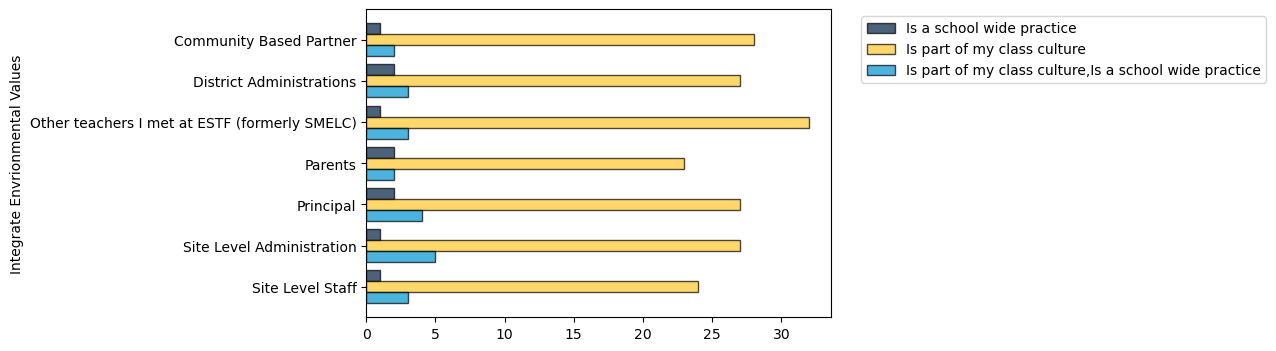

In [374]:
new_truth1 = make_array()
new_new_truth1 = make_array()
number = -1
for x in significantnewconnection1:
    for y in significantnewconnection1.column(x):
        number = number + 1
        if number == significantnewconnection1.num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth1 = np.append(new_truth1,x)
            new_new_truth1 = np.append(new_new_truth1, significantnewconnection1.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Integrate Envrionmental Values', new_truth1).with_column('Values', new_new_truth1).pivot(1,0).barh(0)

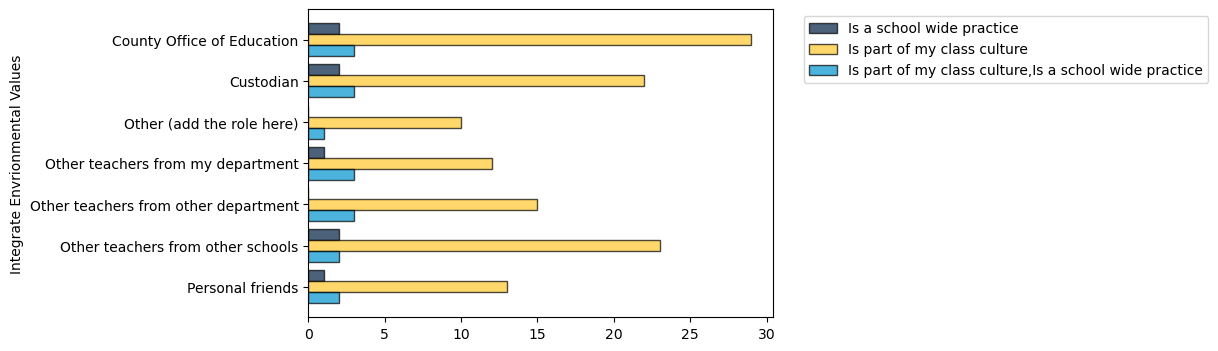

In [375]:
new_truth1 = make_array()
new_new_truth1 = make_array()
number = -1
for x in nonsignificantnewconnection1:
    for y in nonsignificantnewconnection1.column(x):
        number = number + 1
        if number == nonsignificantnewconnection1.num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth1 = np.append(new_truth1,x)
            new_new_truth1 = np.append(new_new_truth1, nonsignificantnewconnection1.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Integrate Envrionmental Values', new_truth1).with_column('Values', new_new_truth1).pivot(1,0).barh(0)

In [376]:
newconnection2 = truth2.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection2 = newconnection2.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection2 = newconnection2.select(0,1,2,3,4,5,7,13,15,16,17)

In [377]:
newconnection3 = truth3.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection3 = newconnection3.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection3 = newconnection3.select(0,1,2,3,4,5,7,13,15,16,17)

In [378]:
newconnection4 = truth4.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection4 = newconnection4.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection4 = newconnection4.select(0,1,2,3,4,5,7,13,15,16,17)

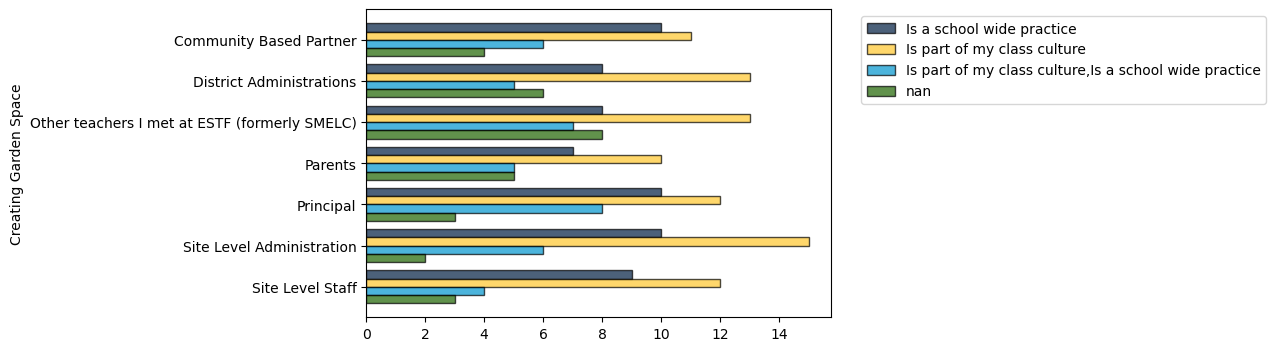

In [379]:
new_truth4 = make_array()
new_new_truth4 = make_array()
number = -1
for x in significantnewconnection4:
    for y in significantnewconnection4.column(x):
        number = number + 1
        if number == significantnewconnection4.num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth4 = np.append(new_truth4,x)
            new_new_truth4 = np.append(new_new_truth4, significantnewconnection4.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Creating Garden Space', new_truth4).with_column('Values', new_new_truth4).pivot(1,0).barh(0)

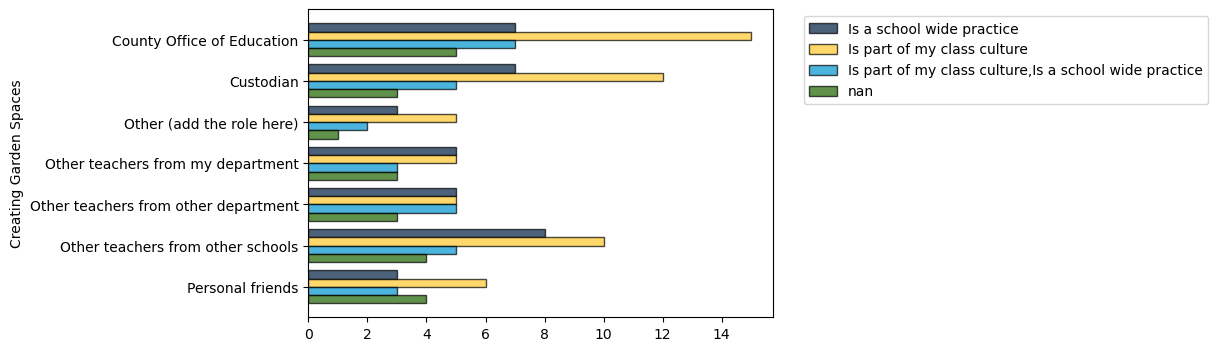

In [380]:
new_truth4 = make_array()
new_new_truth4 = make_array()
number = -1
for x in nonsignificantnewconnection4:
    for y in nonsignificantnewconnection4 .column(x):
        number = number + 1
        if number == nonsignificantnewconnection4 .num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth4 = np.append(new_truth4,x)
            new_new_truth4 = np.append(new_new_truth4, significantnewconnection4.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Creating Garden Spaces', new_truth4).with_column('Values', new_new_truth4).pivot(1,0).barh(0)

In [381]:
connection4 = newconnection4.select(np.arange(3,17))
new_truth4 = make_array()
for x in connection4:
    for y in connection4.column(x):
        if y == 'After ESTF':
            new_truth4 = np.append(new_truth4,x)
        elif y == 'nan': 
            continue
        elif y == "After ESTF":
            continue
        else: 
            continue  
truth4newconnections = Table()

In [382]:
newconnection5 = truth5.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection5 = newconnection5.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection5 = newconnection5.select(0,1,2,3,4,5,7,13,15,16,17)

In [383]:
newconnection6 = truth6.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection6 = newconnection6.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection6 = newconnection6.select(0,1,2,3,4,5,7,13,15,16,17)

In [384]:
newconnection7 = truth7.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection7 = newconnection7.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection7 = newconnection7.select(0,1,2,3,4,5,7,13,15,16,17)

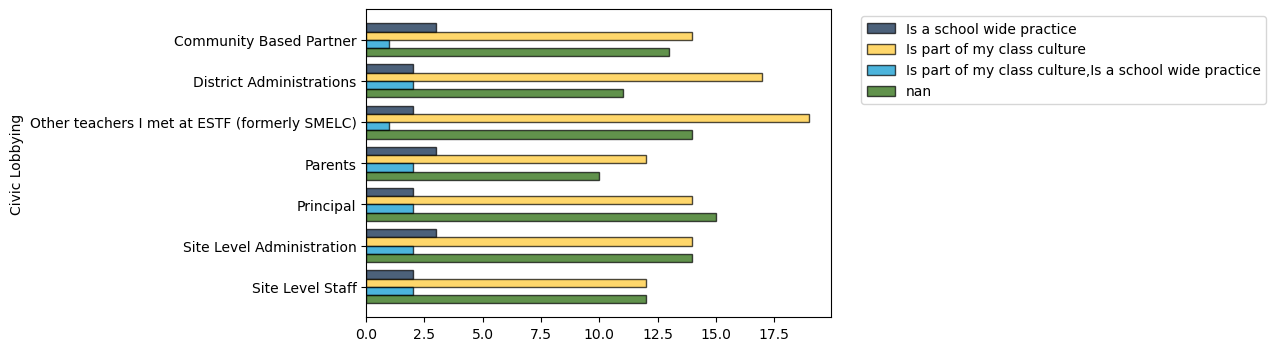

In [385]:
new_truth7 = make_array()
new_new_truth7 = make_array()
number = -1
for x in significantnewconnection7:
    for y in significantnewconnection7 .column(x):
        number = number + 1
        if number == significantnewconnection7.num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth7 = np.append(new_truth7,x)
            new_new_truth7 = np.append(new_new_truth7, significantnewconnection7.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Civic Lobbying', new_truth7).with_column('Values', new_new_truth7).pivot(1,0).barh(0)

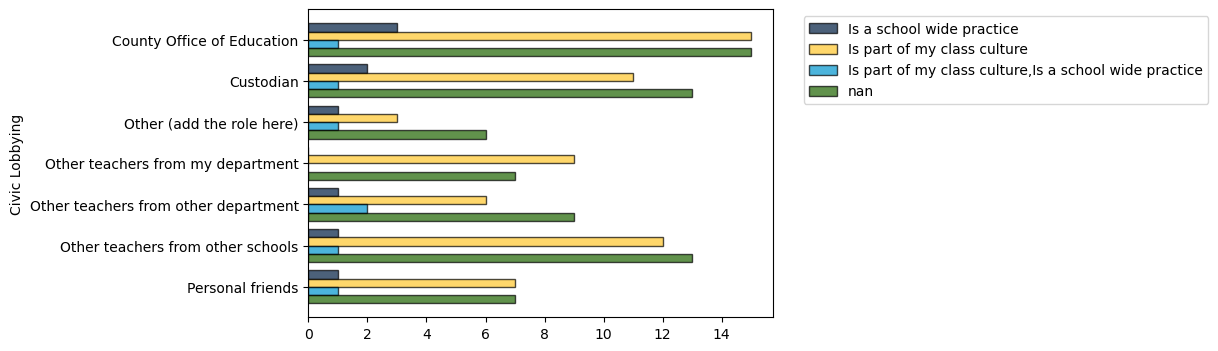

In [386]:
new_truth7 = make_array()
new_new_truth7 = make_array()
number = -1
for x in nonsignificantnewconnection7:
    for y in nonsignificantnewconnection7 .column(x):
        number = number + 1
        if number == nonsignificantnewconnection7.num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth7 = np.append(new_truth7,x)
            new_new_truth7 = np.append(new_new_truth7, nonsignificantnewconnection7.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Civic Lobbying', new_truth7).with_column('Values', new_new_truth7).pivot(1,0).barh(0)

In [387]:
newconnection8 = truth8.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection8 = newconnection8.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection8 = newconnection8.select(0,1,2,3,4,5,7,13,15,16,17)

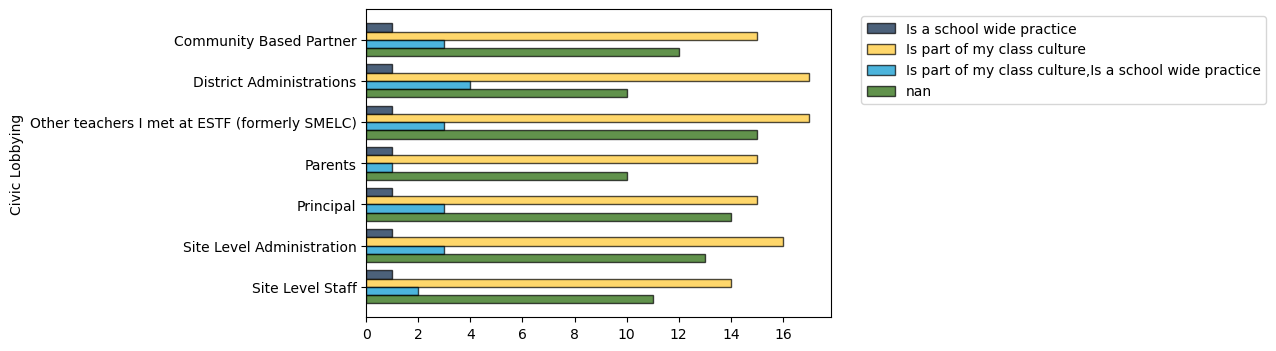

In [388]:
new_truth8 = make_array()
new_new_truth8 = make_array()
number = -1
for x in significantnewconnection8:
    for y in significantnewconnection8 .column(x):
        number = number + 1
        if number == significantnewconnection8.num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth8 = np.append(new_truth8,x)
            new_new_truth8 = np.append(new_new_truth8, significantnewconnection8.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Civic Lobbying', new_truth8).with_column('Values', new_new_truth8).pivot(1,0).barh(0)

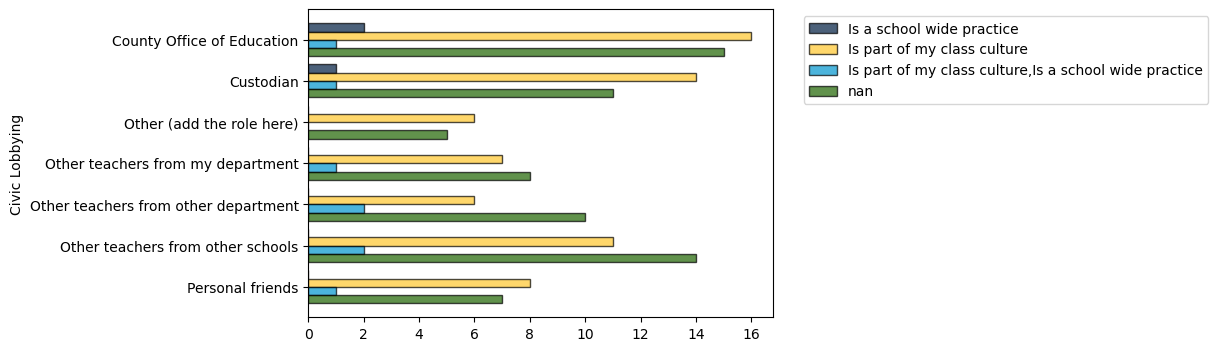

In [389]:
new_truth8 = make_array()
new_new_truth8 = make_array()
number = -1
for x in nonsignificantnewconnection8:
    for y in nonsignificantnewconnection8 .column(x):
        number = number + 1
        if number == nonsignificantnewconnection8.num_rows:
            number = 0
        if y == 'After ESTF':
            new_truth8 = np.append(new_truth8,x)
            new_new_truth8 = np.append(new_new_truth8, nonsignificantnewconnection8.take(number).column(2).item(0))
        else: 
            continue 
truth1newconnections = Table()
truth1newconnections.with_column('Civic Lobbying', new_truth8).with_column('Values', new_new_truth8).pivot(1,0).barh(0)

In [390]:
connection8 = newconnection8.select(np.arange(3,17))
new_truth8 = make_array()
for x in connection8:
    for y in connection8.column(x):
        if y == 'After ESTF':
            new_truth8 = np.append(new_truth8,x)
        elif y == 'nan': 
            continue
        elif y == "After ESTF":
            continue
        else: 
            continue  
truth8newconnections = Table()

In [391]:
newconnection9 = truth9.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection9 = newconnection9.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection9 = newconnection9.select(0,1,2,3,4,5,7,13,15,16,17)

In [392]:
newconnection10 = truth10.join('TeacherID', ESTFfinal,'ResponseId')
significantnewconnection10 = newconnection10.select(0,1,2,3,6,8,9,10,11,12,14)
nonsignificantnewconnection10 = newconnection10.select(0,1,2,3,4,5,7,13,15,16,17)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e012c7c7-0eee-4985-ab9f-6fcbc3bde56b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>